**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.neighbors import KDTree
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        n = len(X)
        m = len(self.X)
        kn = self.n_neighbors
        if (self.algorithm == 'brute'):
            A = scipy.spatial.distance.cdist(X, self.X, metric=self.metric)
            A = np.argpartition(A, kn, axis=1)[:, :kn]
            y = (self.y[A])
            res = np.zeros(n, dtype='int')
            for i in range(n):
                res[i] = np.argmax(np.bincount(y[i]))
            return res
        else:
            tree = KDTree(self.X)
            dist, ind = tree.query(X[:], k=kn)
            A = self.y[ind]
            res = np.zeros(n, dtype='int')
            for i in range(n):
                res[i] = np.argmax(np.bincount(A[i]))
            return res

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 2.44 ms, sys: 482 µs, total: 2.93 ms
Wall time: 4.29 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 14.8 µs


In [13]:
%time clf.predict(X_test)

CPU times: user 5.08 ms, sys: 188 µs, total: 5.27 ms
Wall time: 5.5 ms


array([2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1])

In [14]:
%time my_clf.predict(X_test)

CPU times: user 1.21 ms, sys: 4.36 ms, total: 5.57 ms
Wall time: 3.67 ms


array([2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [15]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [17]:
%time clf.fit(X_train, y_train)

CPU times: user 2.92 ms, sys: 0 ns, total: 2.92 ms
Wall time: 2.51 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [18]:
%time my_clf.fit(X_train, y_train)

CPU times: user 19 µs, sys: 4 µs, total: 23 µs
Wall time: 35.8 µs


In [19]:
%time clf.predict(X_test)

CPU times: user 8.59 ms, sys: 876 µs, total: 9.47 ms
Wall time: 12.7 ms


array([0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1])

In [20]:
%time my_clf.predict(X_test)

CPU times: user 2.98 ms, sys: 0 ns, total: 2.98 ms
Wall time: 1.87 ms


array([0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1])

In [21]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [22]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [23]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [28]:
vectorizer = TfidfVectorizer(max_df=0.02, max_features=1000)
X = vectorizer.fit_transform(data)
X = X.toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [29]:
kfold = KFold(3)
for train_index, test_index in kfold.split(X, target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

(30, 0.4762242716854895)


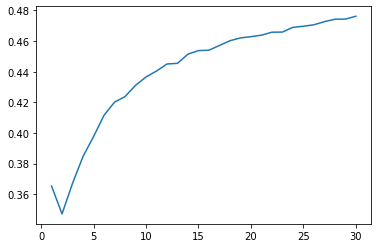

In [30]:
mas = np.zeros(30)


def bestaccuracy(MAX, X, target):
    global mas
    res = -1
    percent = 0
    kfold = KFold(3)
    for i in range(1, MAX+1):
        check = 0
        for train_index, test_index in kfold.split(X, target):
            knn = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric='cosine')
            knn.fit(X[train_index], target[train_index])
            check += accuracy_score(knn.predict(X[test_index]), target[test_index])
        check /= 3
        mas[i-1] = check
        if (check > percent):
            percent = check
            res = i
    return res, percent

print(bestaccuracy(30, X, target))
plt.plot(np.arange(1, 31), mas[0:30])

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [35]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [37]:
test_data = newsgroups['data']
test_target = newsgroups['target']
vocab = vectorizer.get_feature_names()
vectorizer = TfidfVectorizer(max_df=0.02, max_features=1000, vocabulary=vocab)
test_X = vectorizer.fit_transform(test_data)
test_X = test_X.toarray()
knn = MyKNeighborsClassifier(n_neighbors=30, algorithm='brute', metric='cosine')
knn.fit(X, target)
accuracy_score(knn.predict(test_X), test_target)

0.4233935209771641